## Download COCO and ImageNet

- Both have raw images and segmentation masks available
- Both have APIs for calling for specific synsets (e.g. bottles)

- COCO: Following download/load steps from https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
- ImageNet: Submitted request to download

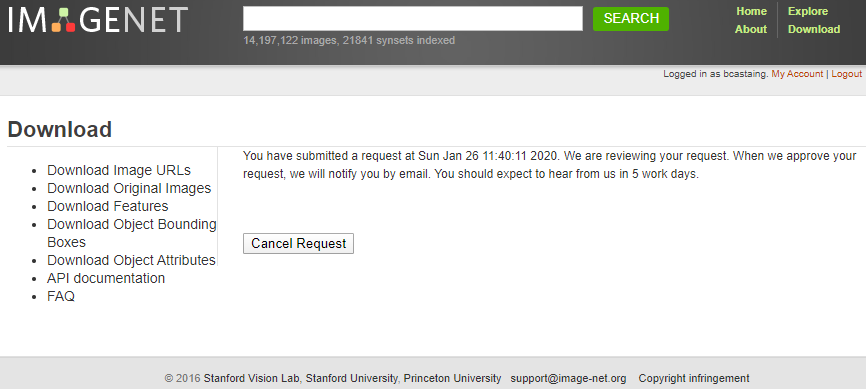

## Download required Python packages

In [ ]:
!pip3 install pycocotools

## Import Python packages

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

## EDA

In [ ]:
# COCO - 8,880 bottle images

dataDir='..'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]


# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
'''
ImageNet - Maybe 3k images that could be useful (containers, equipment (packaging))

Synsets
ImageNet 2011 Fall Release (32326)
 artifact, artefact (10504)
  instrumentality, instrumentation (5494)
   container
   equipment
   
All Synsets: http://image-net.org/api/text/imagenet.bbox.obtain_synset_wordlist
'''